In [19]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (20,10)
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/maksimka/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
import pandas as pd
from string import punctuation
from gensim.models import Word2Vec
path = '/home/maksimka/sphere-ml-intro/lecture07-nlp/blogs_csv/blogtext.csv'
df = pd.read_csv(path, nrows=120000)


In [36]:
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","[info, found, mb, now, wait, untill, team, lea..."
1,2059027,male,15,Student,Leo,"13,May,2004","[these, team, drewes, van, der, laag, urllink,..."
2,2059027,male,15,Student,Leo,"12,May,2004","[in, het, kader, van, kernfusie, op, maak, je,..."
3,2059027,male,15,Student,Leo,"12,May,2004",[]
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004","[thanks, toolbar, i, urls, means, i, show, coo..."


In [23]:
#remove stop words from nltk
df.text = [[word.lower() for word in text.split(" ")\
            if word not in punctuation and word.isalpha()\
            and word not in stopwords.words('english') ] for text in df.text]


'max = 0\nfor i in range(df.shape[0]):\n    print(i)\n    df.iloc[i].text = [ word.lower() for word in df.iloc[i].text.split(" ") if word not in punctuation and word.isalpha()]\n'

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","[info, found, mb, now, wait, untill, team, lea..."
1,2059027,male,15,Student,Leo,"13,May,2004","[these, team, drewes, van, der, laag, urllink,..."
2,2059027,male,15,Student,Leo,"12,May,2004","[in, het, kader, van, kernfusie, op, maak, je,..."
3,2059027,male,15,Student,Leo,"12,May,2004",[]
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004","[thanks, toolbar, i, urls, means, i, show, coo..."


In [27]:
df.to_pickle('df.pkl')  # where to save it, usually as a .pkl


In [28]:
import pickle
with open('words.pkl', 'wb') as f:
    pickle.dump([text for text in df.text], f)

In [31]:
from nltk.corpus import stopwords
cv = CountVectorizer(lowercase=True)
tdata = cv.fit_transform([j  for i in df.text for j in i]) 
ft = cv.get_feature_names() 

In [32]:
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(tdata)



In [33]:
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': ft, 'weight': weights})

In [34]:
tmp = weights_df.sort_values(by='weight',ascending=False)
tmp.head(20)

,term,weight
84749,like,0.008893
148248,the,0.007408
58494,get,0.006736
104509,one,0.006661
157263,urllink,0.006389
120961,really,0.005438
80519,know,0.005220
164909,would,0.004939
59646,go,0.004802
148792,think,0.004740


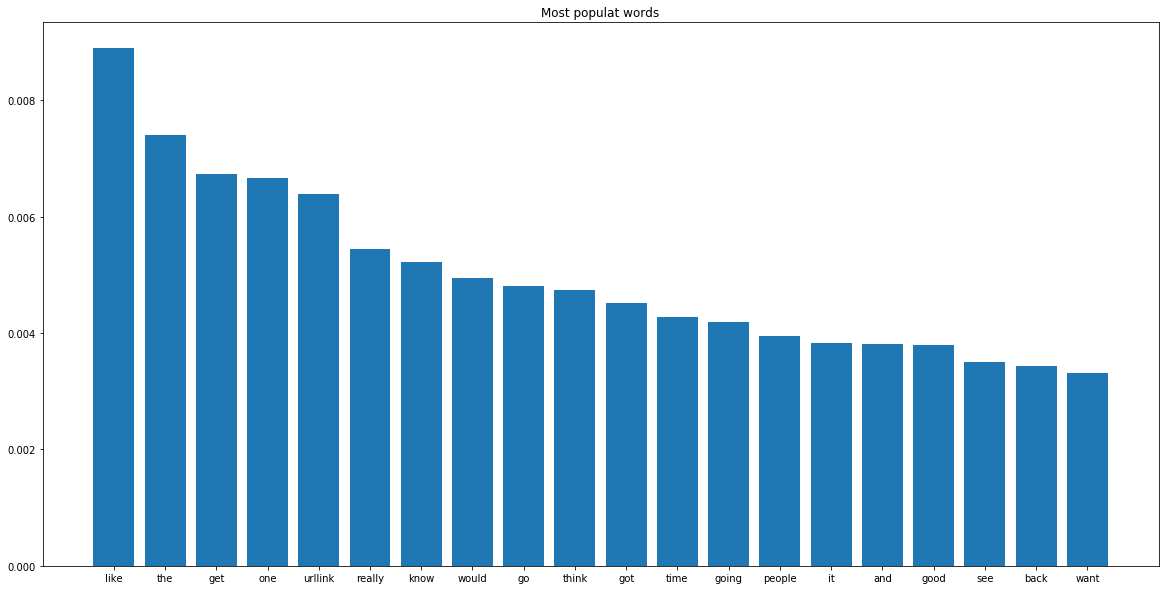

In [49]:
#plot hist
plt.bar(range(20), tmp.weight.values[:20])
#add labels
plt.xticks(range(20), tmp.term.values[:20])
plt.title('Most popular words')
plt.show()

In [53]:
#least popular words is not so interest in hist:
print(tmp.term.values[-20:])
print(tmp.weight.values[-20:])

['bulks' 'omlet' 'frappachino' 'buljaneh' 'bulkiest' 'bulkmail' 'omision'
 'ominpod' 'bulkmailed' 'omigawd' 'omgggggggg' 'frappacinos'
 'omgwtfwwjdbbqrotmfflmfao' 'omgomgomgomgomg' 'frappichino' 'omgomgomg'
 'omgomg' 'omgiaih' 'omgiahe' 'ｚｚｚｚｚｚ']
[1.00172918e-07 1.00172918e-07 1.00172918e-07 1.00172918e-07
 1.00172918e-07 1.00172918e-07 1.00172918e-07 1.00172918e-07
 1.00172918e-07 1.00172918e-07 1.00172918e-07 1.00172918e-07
 1.00172918e-07 1.00172918e-07 1.00172918e-07 1.00172918e-07
 1.00172918e-07 1.00172918e-07 1.00172918e-07 1.00172918e-07]


In [80]:
start_wn = 100 # с какого слова начинаем рисовать, 0 - с самого популярного. (это чтобы посмотреть разные наобы слов)
words_n=50

In [75]:
#size=2
w2v_s2 = Word2Vec(df.text, min_count=5, size=2, iter=10)
word_vectors_s2 = w2v_s2.wv

len(word_vectors_s2.vocab)

49039

In [76]:
#size = 100
w2v_s100 = Word2Vec(df.text, min_count=5, size=100, iter=10)
word_vectors_s100 = w2v_s100.wv
len(word_vectors_s100.vocab)

49039

In [83]:
#apply pca to 100dimensional words
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = np.array([word_vectors_s100[i] for i in word_vectors_s100.index2entity[start_wn:start_wn+words_n]])
pca.fit(X)
Z = pca.transform(X)
print(X.shape, Z.shape)

(50, 100) (50, 2)


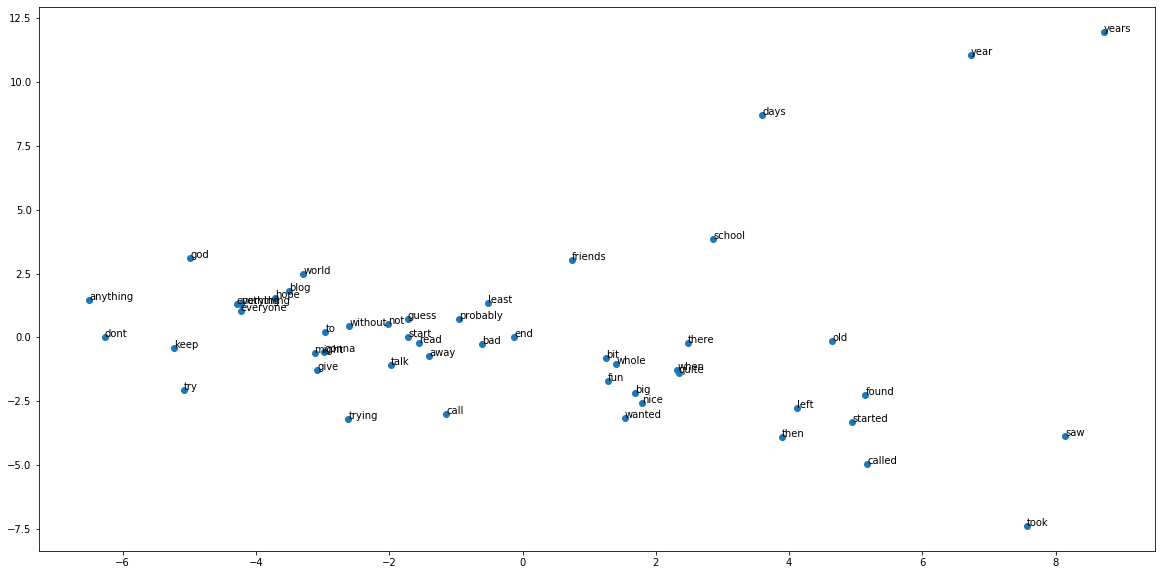

In [84]:
#plot 100dimensional words zip to 2
coord = Z
fig, ax = plt.subplots()
coord = coord.T
ax.scatter(coord[0],coord[1])
for i in range(words_n):
    plt.annotate(word_vectors_s2.index2entity[start_wn + i], (coord[0][i],coord[1][i]) )
plt.show()

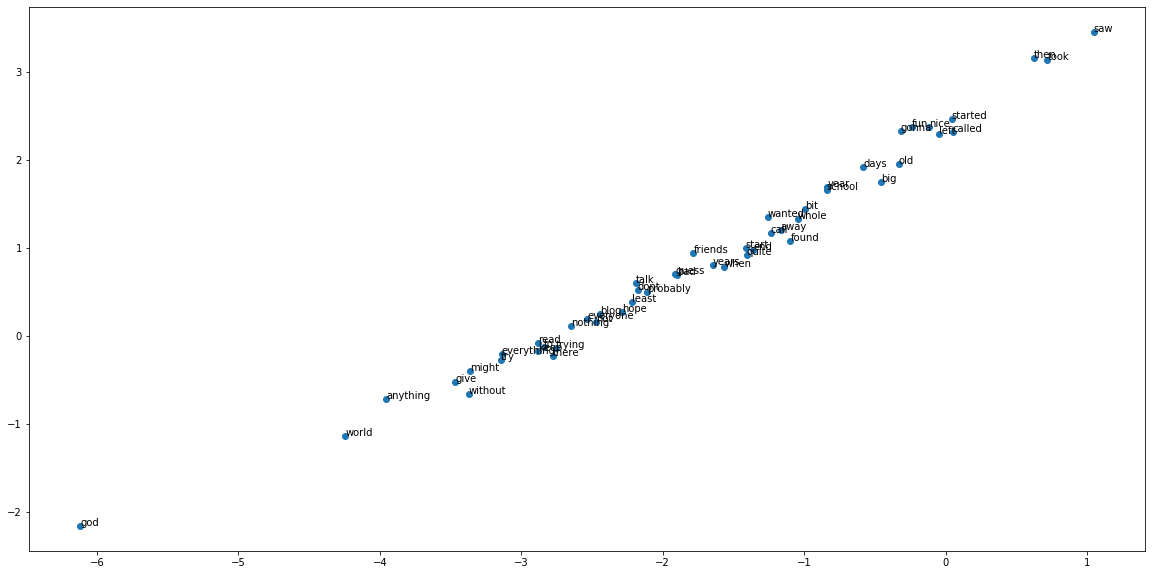

In [86]:
#plot 2dimensional words
coord = np.array([word_vectors_s2[i] for i in word_vectors_s2.index2entity[start_wn:start_wn+words_n]])
fig, ax = plt.subplots()
coord = coord.T
ax.scatter(coord[0],coord[1])
for i in range(words_n):
    plt.annotate(word_vectors_s2.index2entity[start_wn+i], (coord[0][i],coord[1][i]) )
plt.show()

In [ ]:
#Просто решил проверить на сколько сильно будет отличаться картирка если мы сделаем word2vec с размерностью100 
#и потом сожмем, либо сразу сделаем с размерностью 2